## **Network Science Homework 2**
# **PageRank, Communities and Subgraph Patterns**

### **Students:**
- Pedro Azevedo, up201905966@up.pt
- Davi Santos, up202310061@up.pt
- André Regufe, up202107760@up.pt

### Work can be located in [here](https://github.com/wesdpre/Network_Science_projt)

It was use a LLM (Gemini 2.5 Pro Preview 05-06) for help to write the questions and answers in a correct format for the Jupyter Notebook

# **Link Analysis and PageRank**

#### **QUESTION 1.** 

Draw a graph with at least 6 nodes in which one node has a very **high value of PageRank**, although the same node has **low closeness and betweenness centrality** (don’t forget to point out the node).**

**Answer**: 

Consider the following directed graph with 6 nodes:

<div style="text-align: center;">
  <img src="data/Q1/graph6nodes.png" alt="graph with 6 nodes" width="30%" height="20%">
  <p style="font-style: italic; font-size: 0.9em; margin-top: 0.5em;"> Figure 1: Graph with Node A having high PageRank but low Closeness and Betweenness Centrality.</p>
</div>

The target node is **A**.

#### **QUESTION 2.** 

The **damping factor** in PageRank (parameter β, in slides) controls how of often we follow one of the links of the current node vs going to an arbitrary node on the network.

##### **(a)** What does β = 0 mean? What would happen to the PageRank values in that case? Why?

**Answer**: 

The equation that governs if the algorithm follows the outgoing licks is
$$
r_i = \sum_{i -> j}{\beta \frac{r_i}{d_i}} + \left( 1 - \beta \right) \frac{1}{n}
$$ 
where $\beta \in [0, 1]$

In this equation the  damping factor $\beta$ represents the probability of following the outgoing edges.

If $\beta = 0$ then the algorithm will always follow to a random page



##### **(b)** What does β = 1 mean? Can you explain a possible problem with using that value?

**Answer**: 

As explain in the previous question (a) $\beta$ represents the probability of following the ou going edges, if $\beta = 1$ that means that the algorithm always follow the outgoing edges of the current page.

the problems of this implementation are:
- Dead ends : what happens if there is no more outgoing edges on the current page, if the $\beta = 1$ then the algorithm stops without traversing the entire graph.
- Spider traps : the problem of all out-link are within a group, eventually the Spider trap absorbs all importance.

#### **QUESTION 3.** 
**Implement a program** (in any programming language) for manually computing the (normalized) PageRank values of a small network using **power iterations** (the ”flow” mode). Attach the program to your homework submission with a very short description on how it works.

**Answer**: 


In [7]:
import networkx as nx 
import numpy as np
import sys
import os
import random
import json
from networkx.readwrite import json_graph 

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from homeWork1_NS.src.load_save_network import load_network_advanced, save_network_nx, save_graph_network

random.seed(42) 

This Page Rank was created to use as input a networkx.DiGraph graph

we also create a graph to test results 

In [8]:
def my_Page_Rank(graph: nx.DiGraph, beta=0.85, iterations=100, tolerance=1.0e-6, print_iteration=False, print_check=True):
    """
    Computes the PageRank values using power iterations.  (the ”flow” mode)
    
    Args:
        graph (nx.DiGraph): The input directed graph from NetworkX.
        beta (float): The damping factor (probability of following a link).
        iterations (int): The maximum number of iterations to perform.
        tolerance (float): The tolerance for convergence. Iteration stops if the L1 norm
                           of the difference between PageRank vectors in consecutive
                           iterations is less than this.
        print_iteration (bool): If True, prints the PageRank values at each iteration.

    Returns:
        dict: A dictionary with node IDs as keys and their normalized PageRank values as values.
    
    this comment was generated by Gemini 2.5 Pro Preview 05-06
    """
    #Power iterations.  (the ”flow” mode)
    
    nodes = list(graph.nodes())
    N = len(nodes)
    
    if N == 0:
        return {}
    
    if beta < 0 or beta > 1:
        raise ValueError("Damping factor beta must be in the range [0, 1].")
    if iterations <= 0:
        raise ValueError("Number of iterations must be a positive integer.")
    if tolerance <= 0:
        raise ValueError("Tolerance must be a positive number.")
    if not isinstance(graph, nx.DiGraph):
        raise TypeError("Input graph must be a directed graph (nx.DiGraph).")
    
    # First iteration
    final_iteration = 0
    
    # create a page rank list pr
    pr = {node: 1.0 / N for node in nodes}
    
    
    # Ensure all nodes are added, even if isolated after edge directionality
    out_degree = dict(graph.out_degree())
    dangling_nodes = [node for node in nodes if out_degree.get(node, 0) == 0]
    
    if (not print_iteration) and print_check:
        print(f"Computing PageRank with {N} nodes, {len(graph.edges())} edges, and damping factor {beta}.")
        print(f"Total Nodes (N): {N}")
        print(f"Initial PageRank (sample): { {k: v for i, (k,v) in enumerate(pr.items()) if i < 3} }")
        print(f"Dangling Nodes (count): {len(dangling_nodes)}") 
        print(f"Damping Factor (beta): {beta}")
        print("-" * 40)
    
    for iteration in range(1, iterations + 1):
        new_pr = {node: 0.0 for node in nodes}
        iteration_dangling_pr_sum = 0.0
        
        for node in nodes:
            if node in dangling_nodes:
                # Distribute PageRank of dangling nodes evenly
                iteration_dangling_pr_sum += pr[node]
            else:
                # Calculate PageRank contribution from neighbors
                if graph.in_degree(node) > 0:
                    for neighbor in graph.successors(node):
                        new_pr[neighbor] += pr[node] / out_degree[node]
                else:
                    new_pr[node] += 0
        
        for node in nodes:
            dangling_contribution_to_node = iteration_dangling_pr_sum / N 
            new_pr[node] = (1 - beta) / N + beta * (new_pr[node] + dangling_contribution_to_node)
        
        # Check for convergence
        diff = sum(abs(new_pr[node] - pr[node]) for node in nodes)
        pr = new_pr
        
        if print_iteration and print_check:
            print(f"Iteration {iteration}:")
            for node_id in sorted(pr.keys()):
                print(f"  Node {node_id}: {pr[node_id]:.8f}")
            print(f"Diff: {diff:.6e}\n")
            print("-" * 40)
        
        final_iteration = iteration 
        if diff < tolerance:
            if print_check:
                print(f"Converged after {iteration} iterations (L1 Diff: {diff:.6e}).")
            break
    
    # Normalize the PageRank values (final step, mostly for precision)
    total_pr = sum(pr.values())
    if total_pr > 0:
        final_pr = {node: value / total_pr for node, value in pr.items()}
    else:
        final_pr = {node: 0.0 for node in nodes} # Should not happen if N > 0

    if (not print_iteration) and print_check:
        print(f"Final PageRank (the first 3 samples): { {k: v for i, (k,v) in enumerate(final_pr.items()) if i < 3} }")
        print(f"Final PageRank Sum: {sum(final_pr.values()):.6f}")
        print("-" * 40)
        
    return final_pr, final_iteration

Creating a graph to test using watts strogatz graph and converting to a directed graph

In [9]:
# Generate an undirected Watts-Strogatz graph
G = nx.watts_strogatz_graph(n=30, k=4, p=0.3)

# Converting to a directed
Directed_G = nx.DiGraph()
Directed_G.add_nodes_from(G.nodes)
Directed_G.add_edges_from((u, v) if random.random() > 0.5 else (v, u) for u, v in G.edges) # add edges randomly , from u to v 
Directed_G.add_edges_from((a, b) if random.random() > 0.5 else (b, a) for b, a in G.edges) # so that we can have both directions

## start
# Ensure all nodes are added, even if isolated after edge directionality
all_original_nodes = set(G.nodes())
current_digraph_nodes = set(Directed_G.nodes())
if all_original_nodes != current_digraph_nodes:
    Directed_G.add_nodes_from(all_original_nodes - current_digraph_nodes)
## end , this code was completely generated by Gemini 2.5 Pro Preview 05-06

graph_data = json_graph.node_link_data(Directed_G)

# Save the graph using json
with open("data/directed_graph.json", "w") as file: 
    json.dump(graph_data, file)
    
# Save the graph using my custom function for easier reading
save_network_nx(Directed_G, "data/directed_graph_nx.txt")

c:\Users\pedro\anaconda3\envs\NLP\Lib\site-packages\networkx\readwrite\json_graph\node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


File data/directed_graph_nx.txt already exists.


Loading the Graph

In [10]:
with open("data/directed_graph.json", "r") as file:
    loaded_data = json.load(file)

Directed_G_loaded = json_graph.node_link_graph(loaded_data, directed=True)

print("Loaded Graph Nodes:", Directed_G_loaded.nodes())
print("Loaded Graph Edges:", Directed_G_loaded.edges())

Loaded Graph Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Loaded Graph Edges: [(0, 1), (0, 2), (0, 28), (1, 3), (1, 0), (1, 26), (2, 4), (2, 6), (3, 5), (3, 23), (3, 20), (4, 5), (4, 7), (5, 3), (5, 4), (5, 7), (5, 13), (6, 12), (7, 5), (7, 9), (7, 4), (8, 1), (8, 6), (8, 9), (8, 10), (9, 8), (9, 10), (9, 11), (10, 8), (10, 11), (10, 12), (11, 13), (11, 9), (11, 12), (12, 11), (12, 13), (12, 6), (13, 5), (13, 14), (13, 16), (13, 11), (14, 13), (14, 16), (14, 18), (15, 13), (15, 17), (15, 25), (16, 7), (16, 14), (17, 18), (18, 14), (18, 24), (18, 29), (19, 21), (19, 20), (20, 3), (20, 16), (20, 19), (20, 22), (21, 23), (21, 22), (22, 21), (22, 23), (22, 24), (23, 1), (23, 2), (23, 3), (23, 17), (23, 25), (23, 21), (23, 22), (24, 18), (24, 22), (24, 25), (24, 26), (25, 24), (25, 27), (25, 15), (26, 1), (26, 24), (26, 25), (26, 27), (27, 14), (27, 28), (27, 29), (28, 0), (28, 29), (29, 0), (29, 27), (29, 28)]


c:\Users\pedro\anaconda3\envs\NLP\Lib\site-packages\networkx\readwrite\json_graph\node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


In [11]:
final_pr, final_iteration = my_Page_Rank(Directed_G_loaded, beta=0.85, iterations=100, tolerance=1.0e-6)

Computing PageRank with 30 nodes, 90 edges, and damping factor 0.85.
Total Nodes (N): 30
Initial PageRank (sample): {0: 0.03333333333333333, 1: 0.03333333333333333, 2: 0.03333333333333333}
Dangling Nodes (count): 0
Damping Factor (beta): 0.85
----------------------------------------
Converged after 34 iterations (L1 Diff: 8.102533e-07).
Final PageRank (the first 3 samples): {0: 0.03850978495054025, 1: 0.028770181458189277, 2: 0.01975812477323785}
Final PageRank Sum: 1.000000
----------------------------------------


test our results are similar to the official implementation

In [12]:
n_compare = 5
results = nx.pagerank(Directed_G_loaded, alpha=0.85, max_iter=100, tol=1.0e-6)
for i in range(n_compare):
    print(f"Node {i}: My PageRank = {final_pr[i]:.8f}, NetworkX PageRank = {results[i]:.8f}")

Node 0: My PageRank = 0.03850978, NetworkX PageRank = 0.03851562
Node 1: My PageRank = 0.02877018, NetworkX PageRank = 0.02877240
Node 2: My PageRank = 0.01975812, NetworkX PageRank = 0.01976067
Node 3: My PageRank = 0.03375210, NetworkX PageRank = 0.03375269
Node 4: My PageRank = 0.04081663, NetworkX PageRank = 0.04081693


#### **QUESTION 4.** 
Use your program to **compute the PageRank values** of the following network (with β = 0.85). 

**Show the values of all nodes for each iteration** until the computation converges.

![ex graph](data/Q4/ex_graph.png)

**Answer**: 


In [13]:
newG = nx.DiGraph() 
newG.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
newG.add_edges_from([
    ('A', 'B'),
    ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'),
    ('C', 'D'),
    ('D', 'B'),
    ('E', 'D'),
    ('F', 'G'),
    ('G', 'F'),
])
print("Nodes in newG:", newG.nodes())
print("Edges in newG:", newG.edges())

Nodes in newG: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Edges in newG: [('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('C', 'D'), ('D', 'B'), ('E', 'D'), ('F', 'G'), ('G', 'F')]


In [14]:
final_page, final_iteration = my_Page_Rank(newG, beta=0.85, iterations=100, tolerance=1.0e-7, print_iteration=True) 

Iteration 1:
  Node A: 0.02142857
  Node B: 0.14285714
  Node C: 0.05178571
  Node D: 0.29464286
  Node E: 0.05178571
  Node F: 0.17321429
  Node G: 0.14285714
Diff: 4.857143e-01

----------------------------------------
Iteration 2:
  Node A: 0.02142857
  Node B: 0.27187500
  Node C: 0.05178571
  Node D: 0.13982143
  Node E: 0.05178571
  Node F: 0.17321429
  Node G: 0.16866071
Diff: 3.096429e-01

----------------------------------------
Iteration 3:
  Node A: 0.02142857
  Node B: 0.14027679
  Node C: 0.07920201
  Node D: 0.16723772
  Node E: 0.07920201
  Node F: 0.22256362
  Node G: 0.16866071
Diff: 2.631964e-01

----------------------------------------
Iteration 4:
  Node A: 0.02142857
  Node B: 0.16358064
  Node C: 0.05123739
  Node D: 0.18588080
  Node E: 0.05123739
  Node F: 0.19459900
  Node G: 0.21060765
Diff: 1.677877e-01

----------------------------------------
Iteration 5:
  Node A: 0.02142857
  Node B: 0.17942725
  Node C: 0.05618946
  Node D: 0.14329302
  Node E: 0.0561894

#### **QUESTION 5.** 

Use the program to do computations varying the β parameter from 0.0 to 1.0 in steps of 0.05 and:

In [15]:
import matplotlib.pyplot as plt
beta_values = np.arange(0.0, 1.05, 0.05) # from 0.0 to 1.0 inclusive, step 0.05

- **(a)** Show in a plot the **number of iterations needed until convergence is reached as you change** β. Can you explain what is happening?

**Answer**: 


Beta = 0.00 took 1 iterations.
Beta = 0.05 took 5 iterations.
Beta = 0.10 took 7 iterations.
Beta = 0.15 took 8 iterations.
Beta = 0.20 took 9 iterations.
Beta = 0.25 took 11 iterations.
Beta = 0.30 took 12 iterations.
Beta = 0.35 took 14 iterations.
Beta = 0.40 took 16 iterations.
Beta = 0.45 took 18 iterations.
Beta = 0.50 took 21 iterations.
Beta = 0.55 took 24 iterations.
Beta = 0.60 took 28 iterations.
Beta = 0.65 took 33 iterations.
Beta = 0.70 took 40 iterations.
Beta = 0.75 took 49 iterations.
Beta = 0.80 took 63 iterations.
Beta = 0.85 took 86 iterations.
Beta = 0.90 took 133 iterations.
Beta = 0.95 took 200 iterations.
Beta = 1.00 took 200 iterations.


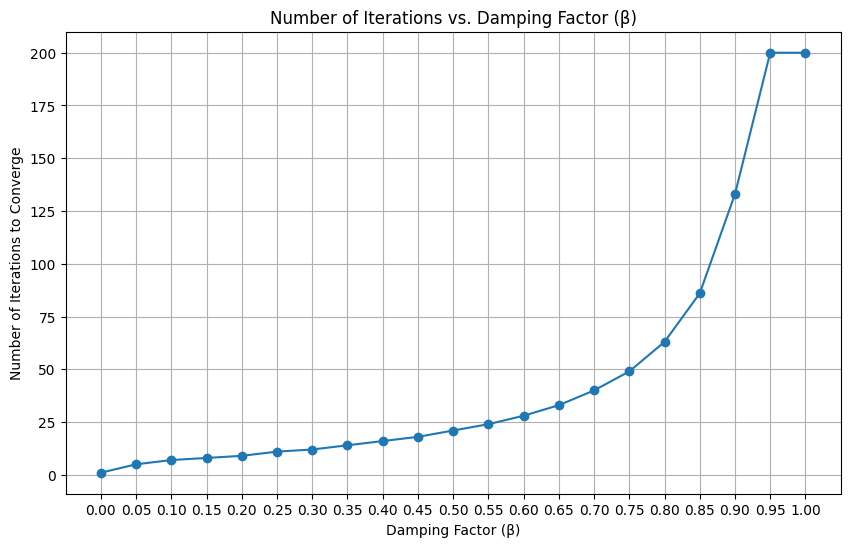

In [16]:
iteration_counts = []

for values in beta_values:
    # We don't need verbose output for each iteration here, just the count
    _, final_iteration = my_Page_Rank(newG, beta=values, iterations=200, tolerance=1.0e-7, print_check=False)
    iteration_counts.append(final_iteration)
    print(f"Beta = {values:.2f} took {final_iteration} iterations.")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta_values, iteration_counts, marker='o', linestyle='-')
plt.title('Number of Iterations vs. Damping Factor (β)')
plt.xlabel('Damping Factor (β)')
plt.ylabel('Number of Iterations to Converge')
plt.xticks(beta_values)
plt.grid(True)
plt.show()

- When β is low (close to 0.0), the random jump component dominates
- When β is high (close to 1.0), the algorithm relies more heavily on the link structure 
- β close to 1.0 can be problematic. If there are dangling nodes (pages with no out-links), PageRank "leaks" out of the system unless handled. If there are spider traps, they can absorb all the PageRank. The `my_Page_Rank` function handles dangling nodes by redistributing their PageRank, which mitigates complete leakage for β=1,
- `my_Page_Rank`  doesn't accept 0 or 1

Conclusion:

Since there are spider traps and dangling nodes in the graph ex F and G we can state that the less the random jump component of the equation is prevalent the more interactions are needed to converge


- **(b)** Show in a plot the different **PageRank values of all nodes as your change** β. Can you divide the nodes into different curve behaviors? Can you explain what is happening?

**Answer**: 


PageRanks for beta = 0.00 (sample A, B, C, D, E, F, G): A=0.143, B=0.143, C=0.143, D=0.143, E=0.143, F=0.143, G=0.143
PageRanks for beta = 0.05 (sample A, B, C, D, E, F, G): A=0.137, B=0.144, C=0.138, D=0.152, E=0.138, F=0.146, G=0.144
PageRanks for beta = 0.10 (sample A, B, C, D, E, F, G): A=0.130, B=0.147, C=0.134, D=0.161, E=0.134, F=0.149, G=0.145
PageRanks for beta = 0.15 (sample A, B, C, D, E, F, G): A=0.124, B=0.149, C=0.130, D=0.169, E=0.130, F=0.152, G=0.147
PageRanks for beta = 0.20 (sample A, B, C, D, E, F, G): A=0.118, B=0.153, C=0.125, D=0.175, E=0.125, F=0.155, G=0.149
PageRanks for beta = 0.25 (sample A, B, C, D, E, F, G): A=0.111, B=0.156, C=0.121, D=0.181, E=0.121, F=0.159, G=0.151
PageRanks for beta = 0.30 (sample A, B, C, D, E, F, G): A=0.104, B=0.160, C=0.117, D=0.186, E=0.117, F=0.162, G=0.153
PageRanks for beta = 0.35 (sample A, B, C, D, E, F, G): A=0.098, B=0.164, C=0.112, D=0.191, E=0.112, F=0.167, G=0.156
PageRanks for beta = 0.40 (sample A, B, C, D, E, F, G): 

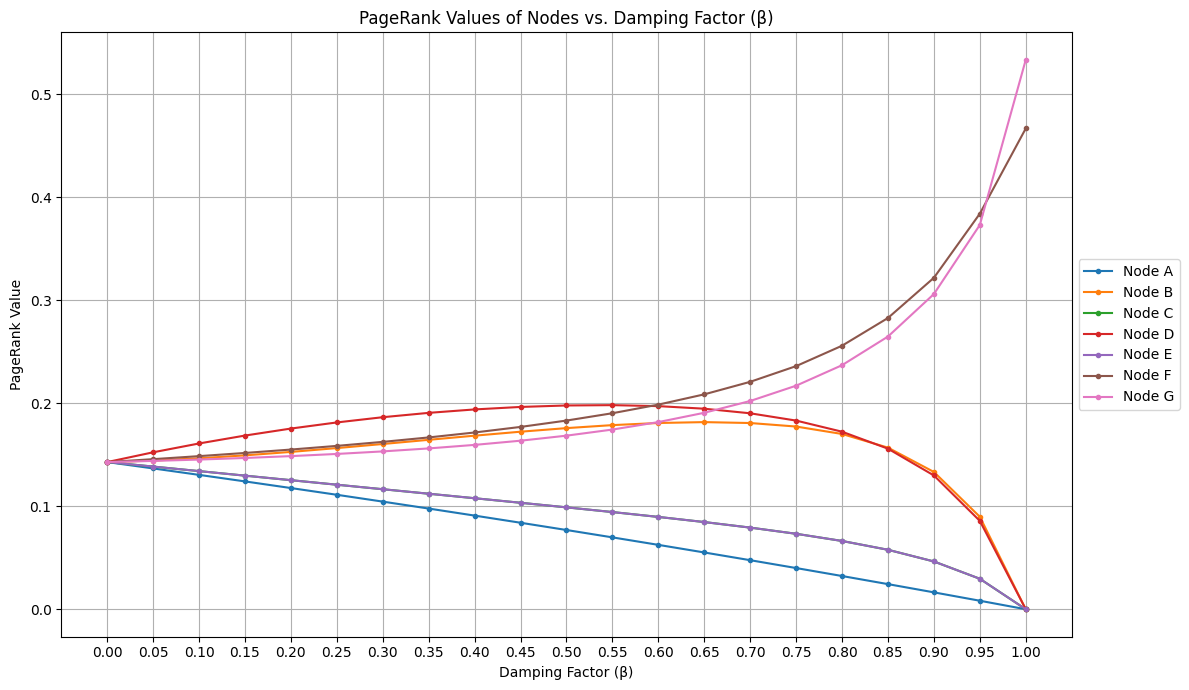

In [17]:
pageRank_results = {node: [] for node in newG.nodes()}

for values in beta_values:
    pr_dict, _ = my_Page_Rank(newG, beta=values, iterations=200, tolerance=1.0e-7, print_check=False)
    for node in newG.nodes():
        pageRank_results[node].append(pr_dict.get(node, 0.0))
    print(f"PageRanks for beta = {values:.2f} (sample A, B, C, D, E, F, G): A={pr_dict.get('A',0):.3f}, B={pr_dict.get('B',0):.3f}, C={pr_dict.get('C',0):.3f}, D={pr_dict.get('D',0):.3f}, E={pr_dict.get('E',0):.3f}, F={pr_dict.get('F',0):.3f}, G={pr_dict.get('G',0):.3f}")
    
# Plotting

plt.figure(figsize=(12, 7))
for node_id in sorted(pageRank_results.keys()): # sorted for consistent legend order
    plt.plot(beta_values, pageRank_results[node_id], marker='.', linestyle='-', label=f'Node {node_id}')

plt.title('PageRank Values of Nodes vs. Damping Factor (β)')
plt.xlabel('Damping Factor (β)')
plt.ylabel('PageRank Value')
plt.xticks(beta_values)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(True)
plt.tight_layout() 
plt.show()

- **When β = 0.0:** All nodes have (or are very close to) the same PageRank value, equal to 1/N (where N is the number of nodes). This is because the random surfer always teleports to a random page, ignoring the link structure.
- **As β increases towards 1.0:** The link structure becomes more prevalent in the Page Rank calculation.
    - Nodes that are "important" according to the link structure ( many incoming links from other important pages, or part of a structure that accumulates rank) will see their PageRank values increase.
    - Nodes that are less "important" ( few incoming links, or primarily link out to non-reciprocating structures) will see their PageRank values decrease relative to the more important nodes.

In this graph we can also observe the absorption of "importance" by spider trap (F,G),forcing the other nodes to have a lower page rank the more "importance" the spider trap has.



# **Community Discovery**

**QUESTION 6** 

For this exercise you will be asked to analyze a set of undirected networks depicting the **”social networks”** (character co-occurrences in a scene) of **movies**.

You should download the following zip file: [movies.zip](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/movies.zip). It contains:

- Nodes and edges (csv format) for 773 different movies from 1915 to 2012
- a movies.csv file with meta data, indicating which movie name, IMDB id, release year, number of nodes and edges
- A readme file describing the original source of the dataset

Start by opening the files on a text editor to see how they internally look like.

In [18]:
from networkx.algorithms.community.quality import modularity
import networkx as nx
from task6.src import utils, modularity_utils
import pandas as pd


In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- **QUESTION (a)** 

Select any six networks of the dataset and using Gephi, networkx or any other platform/library, you should run **Louvain Algorithm** to find the best possible communities and **create a table showing**: id of the dataset, name of the movie, number of nodes and edges, number of communities found and modularity for those communities. Give a brief comment on which networks seem to present **community structure**, and why.

**Answer**: 


In [20]:
movies_data = pd.read_csv("./task6/movies/movies/movies.csv")

table_data = []
table_columns = ['ID', 'Movie Title', 'Nodes', 'Edges', 'Communities', 'Modularity']

# Create a DataFrame to store the results
for index, row in movies_data.iterrows():
    
    id = row['ID']
    # print(f"Processing {id}...")    
    name = row['Title']
    num_nodes = row['Characters'] # This is the number of nodes
    num_edges = row['Edges']
    nodes_df, edges_df = utils.get_network_dataframe(id)
    
    # print(f'nodes columns: {nodes_df.columns}')
    # print(f'edges columns: {edges_df.columns}')
    G = utils.create_graph_from_dataframes(nodes_df, edges_df)
    communities, community_data = utils.compute_louvain_communities(G, edges_df)
    # print(f"Number of communities: {community_data['n_communities']}")
    # print(f"Modularity: {community_data['modularity_score']:.4f}")

    num_communities = community_data['n_communities']
    modularity_score = community_data['modularity_score']
    # Create a new row with the data
    row = (id, name, num_nodes, num_edges, num_communities, modularity_score)
    table_data.append(row)
    # print(row)

# Create a DataFrame from the list of rows
table_df = pd.DataFrame(table_data, columns=table_columns)

table_df.sort_values(by='Modularity', ascending=False, inplace=True)
top_6 = table_df.head(6)
top_6

,ID,Movie Title,Nodes,Edges,Communities,Modularity
74,92,Babel,71,154,6,0.690504
711,837,Traffic,68,131,4,0.668580
447,523,Magnolia,82,239,8,0.662979
342,402,Highlander,59,108,5,0.606953
328,386,He's Just Not That Into You,51,114,4,0.603339
88,110,Batman Returns,51,124,6,0.579572


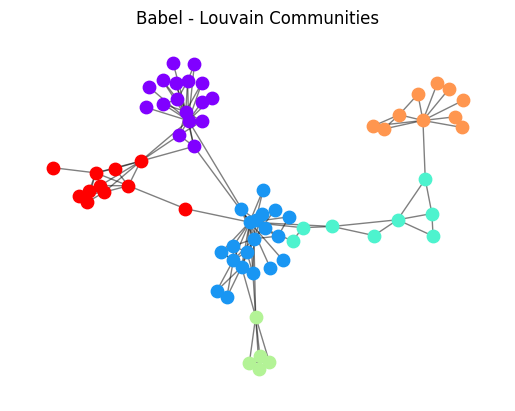

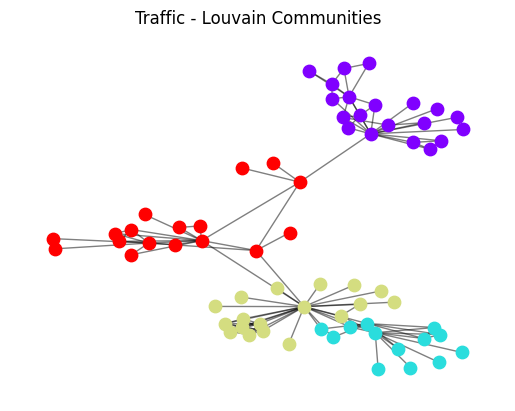

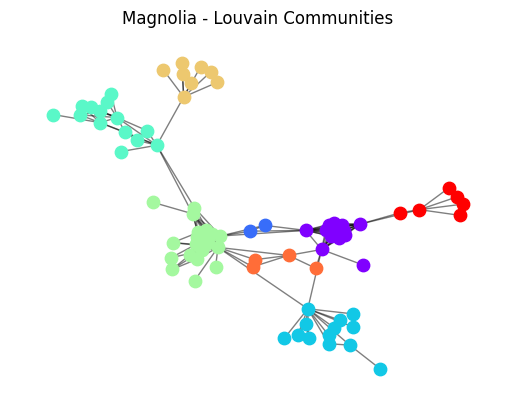

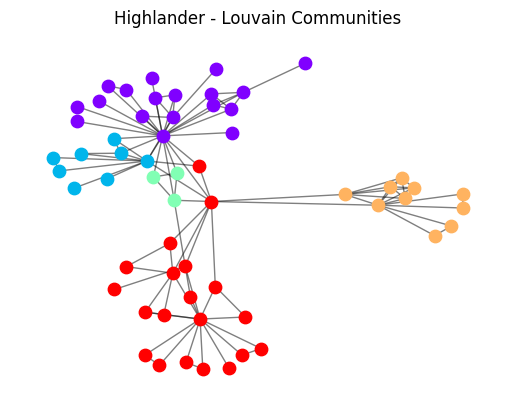

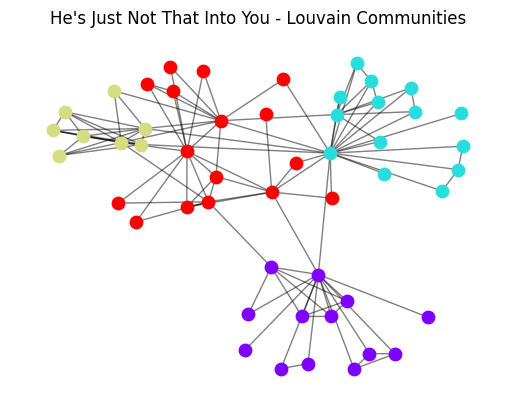

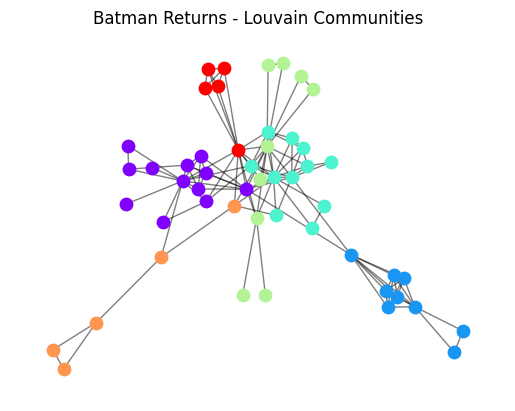

In [21]:
for index, row in top_6.iterrows():
    id = row['ID']
    # print(f"Processing {id}...")    
    name = row['Movie Title']
    num_nodes = row['Nodes']
    num_edges = row['Edges']
    nodes_df, edges_df = utils.get_network_dataframe(id)
    
    # print(f'nodes columns: {nodes_df.columns}')
    # print(f'edges columns: {edges_df.columns}')
    G = utils.create_graph_from_dataframes(nodes_df, edges_df)
    communities, community_data = utils.compute_louvain_communities(G, edges_df)
    # print(f"Number of communities: {community_data['n_communities']}")
    # print(f"Modularity: {community_data['modularity_score']:.4f}")
    utils.visualize_communities(G, communities, name)

**R:** We approached the problem by applying the Louvain Algorithm to all the networks and sorting them by descending modularity. The top 6 modularity scores are for "Babel", "Traffic", "Magnolia", "Highlander", "He's Just Not That Into You" and "Batman Returns" ordered by higher modularity to lower. When analyzing the networks we can see community structure mainly for the 3 networks, since the nodes are clearly well connected and separated from the other clusters exposing the community structures. For the last 3 as the modularity decreases, harder is to notice the community structures. In these last cases we have more separated nodes without clear clustering or aggregation in general. In some cases there are clusters or defined communities but not at entire network level.

- **QUESTION (b)** 

Choose **any two of the movies** (that are not different chapters of the same universe) and produce **visualizations for the networks**, labeling the nodes with their character names, using colors to represent communities and the size of the nodes to represent PageRank values. Try to make the picture as **aesthetically pleasing** as possible, reinforcing the community structure (and explain how you created the layout). Give a brief **informal description on the meaning of the communities** in the context of the movie (are they what you were expecting? are they meaningful? choose movies that you are familiar with and that you believe should have community structure).

**Answer**: 


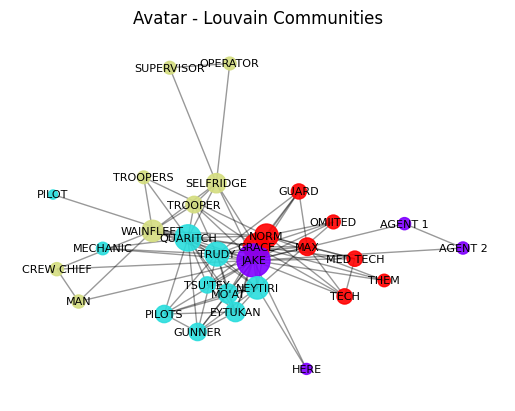

In [22]:
nodes_df, edges_df = utils.get_network_dataframe(88)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
communities, _ = utils.compute_louvain_communities(G, edges_df)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, communities, title="Avatar", pagerank_scores=pagerank_scores)

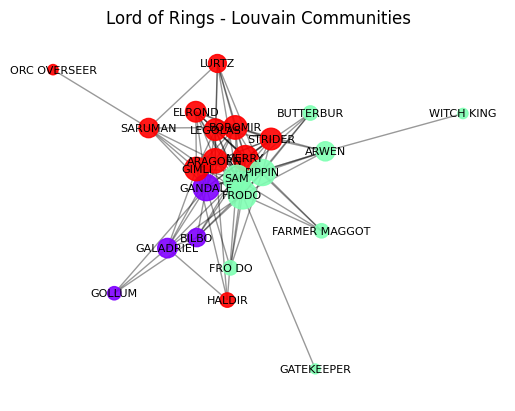

In [23]:

nodes_df, edges_df = utils.get_network_dataframe(512)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
communities, _ = utils.compute_louvain_communities(G, edges_df)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, communities, title="Lord of Rings", pagerank_scores=pagerank_scores)

**R:** For this task the network was constructed using the node labels, the pagerank value obtained by NetworkX.pagerank function, the colors for the nodes were determined using community ids generated by the Louvain Algorithm. We selected the films Avatar (88) - node degree 0.27 - and The Lord of Rings (512) - node degree 0.11.

For Avatar we can notice some understandable community aggregations in terms of colors, but they are not well separated. For example we have the scientists (Grace, Norm, Max...) aggregated in the same community. Jake is the central point of the history and have high betweenes in the network. He is classified in a separated community and makes sense because of his dynamic role in the history construction. The Na'vi characters (Tsu'Tey, Neytiri, Mo'At..) a are also aggregated in the same community. We don't have for any of these communities a clear community structure.

For Lord of the Rings network we also don't findclear community structure defined. However, in the communities we can notice the representation aggregations that are reflected in the film history. The hobbities are classified in the same community (Sam, Pippin, Frodo). They are closelly linked to Gandlaf, which belongs to same community of Galladriel. In other hand there is a aggregation of knights (Gimli, Aragorn, Legolas, Boromir) but having in the same community the Saruman. This community reflects some ambiguity and not clear definition. 

- **QUESTION (c)** 

**Implement a program** (in any programming language) for manually computing the (normalized) **modularity of a network when given a partition**. Test it on one movie of your choice and the on the partitions you produced on the previous questions (and report if the value seems ok). Attach the program to your homework submission with a very short description on how it works and how I could run it.

The modularity can be computed as:
$$
Modularity = \frac{1} {2 m} \left( \sum_{i,j  \in V} \left(A_{ij} - \frac{K_i K_j} {2 m}\right) \delta\left(C_i, C_j\right) \right) 
$$
Where A is the adjacency matrix of the graph, Ci is the community to which node i belongs, ki is the degree of node i, m is the total number of edges and V is the set of nodes.

**Answer**: 


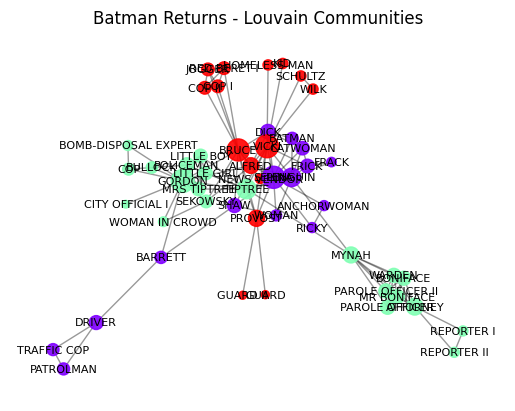

Modularity (local implementation): 0.4822
Modularity (networkx): 0.4749


In [24]:
nodes_df, edges_df = utils.get_network_dataframe(110)
G = utils.create_graph_from_dataframes(nodes_df, edges_df)
comm_2, progress_scores = modularity_utils.greedy_agglomerative(G)
pagerank_scores = utils.compute_pagerank(G, edges_df)
labels = {node: G.nodes[node].get('label') for node in G.nodes()}
# print(labels)
utils.visualize_communities_pgrank(G, comm_2, title="Batman Returns", pagerank_scores=pagerank_scores)
modularity_local_implementation = sum(modularity_utils.get_intra_community_modularity(G, comm) for comm in comm_2)
print(f"Modularity (local implementation): {modularity_local_implementation:.4f}")
# Example usage of the networkx modularity function
communities, community_data = utils.compute_louvain_communities(G, edges_df)
modularity_score = modularity(G, communities)
print(f"Modularity (networkx): {modularity_score:.4f}")

**R:** We found similar results for modularity but not the same values. At the end it impacted also in the communities composition. In this example we had 0.48 as modularity result whereas the NetworkX implementation found 0.57. To execute the program it is needed to:
1. execute the ./task6/src/main.py using the "python main.py" command. The program will ask inputs and output the modularity results of self implemented algorithm

- **QUESTION (d)**

**Implement** (in any programming language) a **simple greedy agglomerative algorithm**: start with each node being a separated community and then do successive iterations in which you try
all possible changes for one node (that is, for each node i ∈ V , try changing its community to all possible communities j ∈ C), and apply the change that produces the best gain in modularity (if there is ties, choose any possible). Attach the program to your homework submission with a very short description on how it works.

Using one of the movies from from the previous questions, make a **plot showing the modularity increase** as you are making more iterations until you reach you a ”local maximum”, and report the communities you found (as a visualization), comparing them to the communities found previously.


**Answer**: 

.

- **QUESTION (e)**

Using your previous program as a basis, explain how could you obtain a **larger quantity of communities**? And how could you obtain **less communities**?

**Answer**: 

.

# **Network Motifs**

**QUESTION 7.** 

For this part of your homework it is highly advisable that you use the [gtrieScanner](http://www.dcc.fc.up.pt/gtries/) tool. You should download, unzip and compile this version: [gtrieScanner_src_01.zip](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/gtrieScanner_src_01.zip) (it is the same as the version online with a newly added ”-raw” option to help you on the homework plus some pre-computed g-tries)


Your first task is to be able to compile the source code. You will need a C++ compiler and make tools. If you have Linux you can simply use g++ and make available on any common distribution. If you use Windows we suggest you use [WSL](https://docs.microsoft.com/en-us/windows/wsl/install) or [Cygwin](https://www.cygwin.com/) to have a shell with Linux-like functionality.

#### **Counting subgraphs**


- **QUESTION (a)**


Consider the following undirected network:

![network_diagram](data/Q7/network_diagram.png)

The frequency (number of occurrences of size 3) of subgraphs of size 3 in this network is:

| Subgraph                                   | Frequency |
| :----------------------------------------: | :-------: |
| <img src="data/Q7/subgraph_p3_image.png" alt="P3 chain" style="height: 1.2em; vertical-align: middle;">| 18        |
| <img src="data/Q7/subgraph_k3_image.png" alt="K3 triangle" style="height: 1.2em; vertical-align: middle;">  | 2         |

You could obtain these results by running (for instance) one of the following commands: 
```
./gtrieScanner -s 3 -m esu -g network.txt -f simple 
./gtrieScanner -s 3 -m gtrie undir3.gt -g network.txt -f simple 
```
supposing that **network.txt** is a text file containing the description of the network as an adjacency list: one line per edge, each line containing two integers separated by a space, the endpoints of the respective edge (the file should have 12 lines, the first of which could be 1 2, for example).

**Your task here is to determine the number of occurrences of all subgraphs of size 4 in this network.** You should put in the report a table like the one shown above (the html version of the output is "broken", so you should produce your own images of the subgraphs)


**Answer**: 


[1, 9, 2, 4, 5, 3, 6, 8, 7]
[(1, 2), (1, 4), (9, 5), (9, 6), (9, 8), (2, 5), (2, 3), (4, 8), (5, 6), (5, 8), (3, 6), (8, 7)]


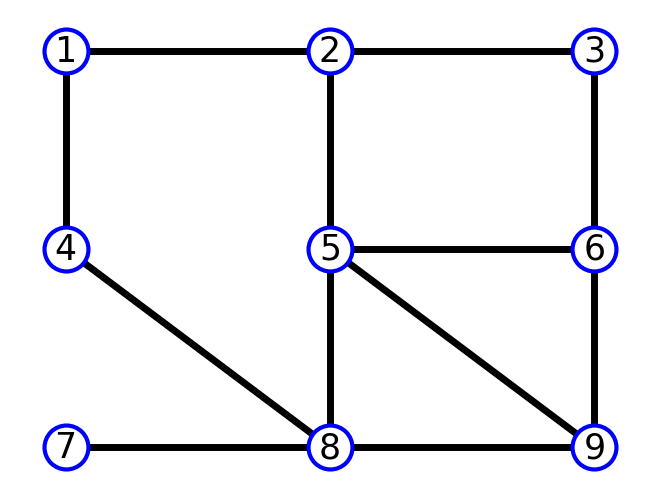

In [25]:
import networkx as nx

# Step 1: Create an undirected graph with no parallel edges
G = nx.Graph()

# Add the nodes and edges
G.add_nodes_from([1,9])
G.add_edges_from([(1,2),(1,4),
                  (2,1), (2,5), (2,3),
                  (3,2), (3,6),
                  (4,1), (5,2), (5,6), (5,8), (5,9),
                  (6,3), (6,5), (6,9),
                  (7,8), (8,4), (8,5), (8,9)])

# Position like the image:
pos = {
    7: (0, 0), 8: (1, 0), 9: (2, 0),
    4: (0, 1), 5: (1, 1), 6: (2, 1),
    1: (0, 2), 2: (1, 2), 3: (2, 2)
}

options = {
    "with_labels": True,
    "font_size": 25,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "blue",
    "linewidths": 3,
    "width": 5,
}

# Show the nodes and edges
print(G.nodes)
print(G.edges)

# Draw the graph
nx.draw(G, pos, **options)


In [26]:
#  Write to file in gtrieScanner-compatible format
with open("network.txt", "w") as f:
    for u, v in G.edges():
        f.write(f"{u} {v}\n")

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os

adj_matrix_1 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 1, 0, 0]
]) # freq = 21

adj_matrix_2 = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 0],
    [1, 0, 0, 0]
]) # freq = 5

adj_matrix_3 = np.array([
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0]
]) # freq = 4 

adj_matrix_4 = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
]) # freq = 1

adj_matrix_5 = np.array([
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 0]
]) # freq = 1


pos1 = {
    2: (0, 1), 3: (1, 1),
    0: (0, 2), 1: (1, 2), 
}

options2 = {
    "with_labels": False,
    "node_size": 150,
    "node_color": "black",
    "edgecolors": "black",
    "width": 3,
}

adj_matrices = [adj_matrix_1, adj_matrix_2, adj_matrix_3, adj_matrix_4, adj_matrix_5]

# Create output directory if it doesn't exist
output_dir = "subgraph_images"
os.makedirs(output_dir, exist_ok=True)

# Draw all graphs
for i, mat in enumerate(adj_matrices, 1):
    G = nx.from_numpy_array(mat)
    plt.figure(figsize=(1.5,1.5))
    plt.title(f"Subgraph {i}", fontsize=8)
    nx.draw(G, pos1, **options2)
    plt.axis("off")             # Hide axis
    plt.tight_layout()
    filepath = os.path.join(output_dir, f"subgraph{i}.png")
    plt.savefig(filepath, dpi=200)
    plt.close()



To generate the subgraphs, we plotted the network and saved its adjacency list to a `.txt` file containing 12 lines, each representing a pair of connected nodes (as shown in the code above).
After generating the file, we ran the following command in the shell to search for subgraphs of size 4 within the network:

`
gtrieScanner -s 4 -m esu -g network.txt -f simple
`

We got 5 subgraphs as shown in the table below:

## Subgraphs Table:

| Subgraph      | Frequency |
|----------------------|-----------|
| <img src="task7/Task7_NS/subgraph_images/subgraph1.png" width="100"/>   | 21        |
| <img src="task7/Task7_NS/subgraph_images/subgraph2.png" width="100"/>   | 5         |
| <img src="task7/Task7_NS/subgraph_images/subgraph3.png" width="100"/>   | 4         |
| <img src="task7/Task7_NS/subgraph_images/subgraph4.png" width="100"/>   | 1         |
| <img src="task7/Task7_NS/subgraph_images/subgraph5.png" width="100"/>   | 1         |

#### **A bit of math: subgraphs in purely random networks**
- **QUESTION (b)**

Imagine you have a $G_{np}$ undirected Erd˝os–R´enyi random network. What is its expected number of triangles ( <img src="data/Q7/subgraph_k3_image.png" alt="K3 triangle" style="height: 1.2em; vertical-align: middle;">)? And what about the expected number of chains (<img src="data/Q7/subgraph_p3_image.png" alt="P3 chain" style="height: 1.2em; vertical-align: middle;">)? Justify your answer. 

Note that you can test your theory by generating Erd˝os–R´enyi networks and counting the subgraphs using gtrieScanner, but your answer should be stated as formulas involving $n$ and $p$.


**Answer**: 

### 📊 Expected Subgraph Counts in Erdős–Rényi Graph \( G(n, p) \)

  - **Expected number of triangles**:

  $$
  \mathbb{E}[\text{Triangles}] = \binom{n}{3} \cdot p^3 = \frac{n(n - 1)(n - 2)}{6} \cdot p^3
  $$

- **Expected number of 3-node chains (Path of length 2)**:

  $$
  \mathbb{E}[\text{Chains}] = \binom{n}{3} \cdot 3p^2(1 - p) = \frac{n(n - 1)(n - 2)}{2} \cdot p^2(1 - p)
  $$

For testing the hypothesis we generated 2 networks containing 500 nodes and 1000 nodes and evaluated the error (%). After creating the networks, we used `Gtrie` to count the subgraphs with 3 nodes (chains and triangles), using the code below (example for the file with 1000 nodes):

`gtrieScanner -s 3 -m esu -g Expected1000_p0.1.txt -f simple`

In [28]:
from IPython.display import Markdown

def generate_erdos_renyi_and_save(n, p, filename):
    G = nx.erdos_renyi_graph(n, p)
    # Save as edge list (one edge per line, undirected)
    with open(f"{filename}.txt", "w") as f:
        for u, v in G.edges():
            f.write(f"{u+1} {v+1}\n")

def expected_triangles(n, p):
    return (n * (n - 1) * (n - 2) / 6) * (p ** 3)

def expected_chains(n, p):
    return (n * (n - 1) * (n - 2) / 2) * (p ** 2) * (1 - p)

Lets try 500 nodes

In [29]:
n = 500

# Generate the adjency files (Only load the next cell when necessary!!!)
#for p in [0.01, 0.05, 0.1]:
    #generate_erdos_renyi_and_save(500, p, f"Teste_Expected500_p{p}")

# Calculate the expected frequencies
expected_triangles_1 = expected_triangles(n, 0.01)
expected_chains_1 = expected_chains(n, 0.01)

expected_triangles_2 = expected_triangles(n, 0.05)
expected_chains_2 = expected_chains(n, 0.05)

expected_triangles_3 = expected_triangles(n, 0.1)
expected_chains_3 = expected_chains(n, 0.1)

# Real frequencies (calculated by Gtrie)
real1_triangles = 19
real1_chains = 6642

real2_triangles = 2784
real2_chains = 151989

real3_triangles = 20197
real3_chains = 550481

from IPython.display import Markdown

def percentage_error(expected, real):
    return abs(expected - real) / expected * 100 if expected != 0 else 0

Markdown(f"""
### Subgraph Frequencies in Erdős–Rényi \( G(n=500, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | {expected_triangles_1:.2f} | {real1_triangles} | {percentage_error(expected_triangles_1, real1_triangles):.1f}% | {expected_triangles_2:.2f} | {real2_triangles} | {percentage_error(expected_triangles_2, real2_triangles):.1f}% | {expected_triangles_3:.2f} | {real3_triangles} | {percentage_error(expected_triangles_3, real3_triangles):.1f}% |
| **Chain (Path-3)**   | {expected_chains_1:.2f}    | {real1_chains}     | {percentage_error(expected_chains_1, real1_chains):.1f}% | {expected_chains_2:.2f}    | {real2_chains}     | {percentage_error(expected_chains_2, real2_chains):.1f}% | {expected_chains_3:.2f}    | {real3_chains}     | {percentage_error(expected_chains_3, real3_chains):.1f}% |

Le's try 1000 nodes for testing if we can obtain lower error values!
""")



<>:41: SyntaxWarning: invalid escape sequence '\('
<>:41: SyntaxWarning: invalid escape sequence '\('
C:\Users\pedro\AppData\Local\Temp\ipykernel_10880\2596487662.py:41: SyntaxWarning: invalid escape sequence '\('
  """)



### Subgraph Frequencies in Erdős–Rényi \( G(n=500, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | 20.71 | 19 | 8.3% | 2588.56 | 2784 | 7.6% | 20708.50 | 20197 | 2.5% |
| **Chain (Path-3)**   | 6150.42    | 6642     | 8.0% | 147548.06    | 151989     | 3.0% | 559129.50    | 550481     | 1.5% |

Le's try 1000 nodes for testing if we can obtain lower error values!


n = 1000

In [30]:
n = 1000

# Generate the adjency files (Only load the next cell when necessary!!!)
#for p in [0.01, 0.05, 0.1]:
    #generate_erdos_renyi_and_save(1000, p, f"Expected1000_p{p}")

# Calculate the expected frequencies
expected_triangles_1 = expected_triangles(n, 0.01)
expected_chains_1 = expected_chains(n, 0.01)

expected_triangles_2 = expected_triangles(n, 0.05)
expected_chains_2 = expected_chains(n, 0.05)

expected_triangles_3 = expected_triangles(n, 0.1)
expected_chains_3 = expected_chains(n, 0.1)

# Real frequencies (calculated by Gtrie)
real1_triangles = 151
real1_chains = 48076

real2_triangles = 20717
real2_chains = 1184104

real3_triangles = 164933
real3_chains = 4467024

from IPython.display import Markdown

def percentage_error(expected, real):
    return abs(expected - real) / expected * 100 if expected != 0 else 0

Markdown(f"""
### Subgraph Frequencies in Erdős–Rényi \( G(n=1000, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | {expected_triangles_1:.2f} | {real1_triangles} | {percentage_error(expected_triangles_1, real1_triangles):.1f}% | {expected_triangles_2:.2f} | {real2_triangles} | {percentage_error(expected_triangles_2, real2_triangles):.1f}% | {expected_triangles_3:.2f} | {real3_triangles} | {percentage_error(expected_triangles_3, real3_triangles):.1f}% |
| **Chain (Path-3)**   | {expected_chains_1:.2f}    | {real1_chains}     | {percentage_error(expected_chains_1, real1_chains):.1f}% | {expected_chains_2:.2f}    | {real2_chains}     | {percentage_error(expected_chains_2, real2_chains):.1f}% | {expected_chains_3:.2f}    | {real3_chains}     | {percentage_error(expected_chains_3, real3_chains):.1f}% |
""")

<>:39: SyntaxWarning: invalid escape sequence '\('
<>:39: SyntaxWarning: invalid escape sequence '\('
C:\Users\pedro\AppData\Local\Temp\ipykernel_10880\499219552.py:39: SyntaxWarning: invalid escape sequence '\('
  """)



### Subgraph Frequencies in Erdős–Rényi \( G(n=1000, p) \) Networks

| Subgraph Type       | p = 0.01 (Expected) | p = 0.01 (Real) | Error (%) | p = 0.05 (Expected) | p = 0.05 (Real) | Error (%) | p = 0.1 (Expected) | p = 0.1 (Real) | Error (%) |
|---------------------|---------------------|------------------|-----------|----------------------|------------------|-----------|---------------------|-----------------|-----------|
| **Triangle**         | 166.17 | 151 | 9.1% | 20770.88 | 20717 | 0.3% | 166167.00 | 164933 | 0.7% |
| **Chain (Path-3)**   | 49351.60    | 48076     | 2.6% | 1183939.88    | 1184104     | 0.0% | 4486509.00    | 4467024     | 0.4% |


#### **Back to empirical findings: uncovering motifs in bacteria**
- **QUESTION (c)**

Your task is now to find some network motifs of the transcriptional regulation directed network of the bacteria [Escherichia coli](https://en.wikipedia.org/wiki/Escherichia_coli). Start by downloading the network as a weighted adjacency list: [ecoli.txt](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/ecoli.txt) (each line is an edge in the format start node end node weight)

This directed network is ready for being fed to gtrieScanner. For example you could run:
```
./gtrieScanner -s 3 -d -m gtrie dir3.gt -g ecoli.txt
```
This would compute the frequency of all possible 13 types of size 3 subgraphs, and it should show you that the most frequent one is the following, appearing 250 times:

<img src="data/Q7/subgraph_o3_image.png" alt="P3 chain" style="height: 1.2em; vertical-align: middle;">

Now, if you add the ”-r n” option, it should produce n networks with the same degree sequence and it will you show you how often each subgraph appears on it. For example:
```
./gtrieScanner -s 3 -m gtrie dir3.gt -d -g ecoli.txt -r 500 -raw
```
**Check the results and report on what is the more overrepresented subgraph, including its z-score (Z), frequency on the original network (real), average number of occurrences (avgR) and standard deviation (stdevR)) on the randomized networks**.

The z-score of subgraph i is computed as $Z_i = \frac {(real_i − avgR_i)} {stdevR_i}$ as in ([Milo et al. 2004](https://www.weizmann.ac.il/mcb/UriAlon/sites/mcb.UriAlon/files/uploads/CollectionsOfComplexNetwroks/superfamilies_of_evolved_and_designed_networks.pdf)).

Notice how the most frequent subgraph is not the most significant one. Check if your very simplistic analysis is consistent with the known literature ([Milo et al. 2002](https://www.weizmann.ac.il/plants/Milo/sites/plants.Milo/files/publications/824.full_.pdf)) ([Shen-Orr et al. 2002](http://courses.cms.caltech.edu/cs191/paperscs191/alon2002.pdf)), that is, if the motif you found is also reported (**what is the name given to this motif ?**)


**Answer**: 


In [31]:
adj_matrix_1 = np.array([
    [0, 1, 1],
    [0, 0, 1],
    [0, 0, 0]
]) # freq = 130

adj_matrix_2 = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 0, 0]
]) # freq = 250

adj_matrix_3 = np.array([
    [0, 1, 1],
    [0, 0, 0],
    [0, 0, 0]
]) # freq = 168

adj_matrix_4 = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 0, 0]
]) # freq = 126


options2 = {
    "with_labels": False,
    "node_size": 150,
    "node_color": "black",
    "edgecolors": "black",
    "width": 3,
}

adj_matrices = [adj_matrix_1, adj_matrix_2, adj_matrix_3, adj_matrix_4]

# Create output directory if it doesn't exist
output_dir = "motifs_images_directed"
os.makedirs(output_dir, exist_ok=True)

# Draw all graphs as directed
for i, mat in enumerate(adj_matrices, 1):
    G = nx.from_numpy_array(mat, create_using=nx.DiGraph)  # <-- Make it directed
    plt.figure(figsize=(1.5,1.5))
    plt.title(f"Subgraph {i}", fontsize=8)
    nx.draw(G, pos1, arrows=True, **options2)  # arrows=True to show direction
    plt.axis("off")
    plt.tight_layout()
    filepath = os.path.join(output_dir, f"motif{i}.png")
    plt.savefig(filepath, dpi=200)
    plt.close()


Markdown(f"""
### 🧬 Motif Analysis of *E. coli* Transcriptional Regulatory Network

#### Summary of gtrieScanner Results

We analyzed the directed network using `gtrieScanner` to identify all 3-node subgraphs (motifs) with the code bellow:
         
`gtrieScanner-s 3-m gtrie dir3.gt-d-g ecoli.txt-r 500-raw`

 After comparing the real network to 500 randomized networks with the same degree sequence, we obtained the following results:


| Subgraph Type (ID) | Structure                                   | Real Frequency | Random Avg | Std Dev | Z-Score |
|--------------------|---------------------------------------------|----------------|-------------|---------|---------|
| **ID: 011-001-000** | <img src="task7/Task7_NS/motifs_images_directed/motif1.png" width="100"/> | 130            | 12.05       | 3.22    | **36.63** |
| **ID: 001-100-000** | <img src="task7/Task7_NS/motifs_images_directed/motif2.png" width="100"/> | 250            | 345.19      | 13.91   | **-6.84** |
| **ID: 011-000-000** | <img src="task7/Task7_NS/motifs_images_directed/motif3.png" width="100"/> | 168            | 278.06      | 7.12    | **-15.46** |
| **ID: 000-100-100** | <img src="task7/Task7_NS/motifs_images_directed/motif4.png" width="100"/> | 126            | 237.74      | 5.99    | **-18.66** |
       
As supported by the literature, the most statistically significant motif is the **Feedforward Loop (FFL)** (see picture of subgraph 1):  
> *"A transcription factor X regulates a second transcription factor Y, and both jointly regulate one or more operons Z₁...Zₙ. An example of a feedforward loop is the L-arabinose utilization system."*  
— *Milo et al., 2004*  """)


### 🧬 Motif Analysis of *E. coli* Transcriptional Regulatory Network

#### Summary of gtrieScanner Results

We analyzed the directed network using `gtrieScanner` to identify all 3-node subgraphs (motifs) with the code bellow:

`gtrieScanner-s 3-m gtrie dir3.gt-d-g ecoli.txt-r 500-raw`

 After comparing the real network to 500 randomized networks with the same degree sequence, we obtained the following results:


| Subgraph Type (ID) | Structure                                   | Real Frequency | Random Avg | Std Dev | Z-Score |
|--------------------|---------------------------------------------|----------------|-------------|---------|---------|
| **ID: 011-001-000** | <img src="task7/Task7_NS/motifs_images_directed/motif1.png" width="100"/> | 130            | 12.05       | 3.22    | **36.63** |
| **ID: 001-100-000** | <img src="task7/Task7_NS/motifs_images_directed/motif2.png" width="100"/> | 250            | 345.19      | 13.91   | **-6.84** |
| **ID: 011-000-000** | <img src="task7/Task7_NS/motifs_images_directed/motif3.png" width="100"/> | 168            | 278.06      | 7.12    | **-15.46** |
| **ID: 000-100-100** | <img src="task7/Task7_NS/motifs_images_directed/motif4.png" width="100"/> | 126            | 237.74      | 5.99    | **-18.66** |

As supported by the literature, the most statistically significant motif is the **Feedforward Loop (FFL)** (see picture of subgraph 1):  
> *"A transcription factor X regulates a second transcription factor Y, and both jointly regulate one or more operons Z₁...Zₙ. An example of a feedforward loop is the L-arabinose utilization system."*  
— *Milo et al., 2004*  

#### **Characterizing families of networks using motifs**

Start by carefully reading the following paper: 

[Milo et al. ”Superfamilies of evolved and designed networks.” Science 303.5663 (2004)](https://www.weizmann.ac.il/mcb/UriAlon/sites/mcb.UriAlon/files/uploads/CollectionsOfComplexNetwroks/superfamilies_of_evolved_and_designed_networks.pdf) 

The idea here is to perform a very similar analysis, even using some of the same networks!

- **QUESTION (d)**

Download this set of 8 directed networks: networks.zip (inside the zip there is a [README.txt](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/networks.zip) explaining what is each network). **Use gtrieScanner to compute motif fingerprints of all networks. You should produce and include in the report the following:**
-  Plot(s) showing the (normalized) significance profile (SP) of all 13 directed motifs of size 3 for each network. Try to expose the similarity between groups of networks. It should be clear to which subgraph corresponds each data point (ex: see figure 1 of the paper).
- One heat map of 8 × 8 cells showing the correlation between the SPs of all pairs of networks (ex: see figure 2 of the paper).
- A visual description of the main characteristic motifs of each group of networks (that is, you should draw them). Can you give an interpretation on why are they so significant?

You should use at least 100 random networks for each original network and you can opt to ignore subgraphs that occur only once in the original network (attributing a z-score of zero to them).

For normalizing the z-scores use the suggested formula: $ S P_i = \frac{Z_i} { \sqrt{ \sum{} \left( Z^2_i \right)} }$

For the heat map you can use any sofware. R and Python have several possible packages, but even Excel or LibreOffice will suffice (use range conditional formatting). You even have some possible [online alternatives](http://www.heatmapper.ca/). If you know about it, you can even use a clustering algorithm to produce a dendrogram showcasing the relationship between the families of networks.


**Answer**: 

For completing this task first we ran the following code for each of the 8 networks:

`gtrieScanner -s 3 -d -m gtrie dir3.gt -g yeast.txt -r 100 -raw`

After that we extracted the Z scores of all 13 patterns and created a vector with that. An important key to have in mind here is that the motifs are in the same order in the output of `Gtrie` algorithm.

Then we normalize all the vectors and plotted them.

In [ ]:
# First we loaded the Z-scores vectors

z_vector_circuit1 = np.array([
    9.82,    # motif 1
    1.88,    # motif 2
    1.60,    # motif 3
    -2.76,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_circuit2 = np.array([
    18.00,    # motif 1
    1.76,    # motif 2
    1.65,    # motif 3
    -6.40,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_ecoli = np.array([
    32.94,    # motif 1
    -7.83,    # motif 2
    -16.82,    # motif 3
    -21.81,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_english = np.array([
    34.09,   # motif 1
    29.78,   # motif 2
    28.90,   # motif 3
    23.65,   # motif 4
    20.96,   # motif 5
   -14.55,   # motif 6
   -18.66,   # motif 7
   -22.14,   # motif 8
   -24.23,   # motif 9
   -24.55,   # motif 10
   -31.21,   # motif 11
   -33.74,   # motif 12
   -35.17    # motif 13
])

z_vector_french = np.array([
    26.48,   # motif 1
    22.87,   # motif 2
    19.89,   # motif 3
    15.14,   # motif 4
    4.85,    # motif 5
   -9.23,    # motif 6
  -12.98,    # motif 7
  -19.35,    # motif 8
  -23.15,    # motif 9
  -26.22,    # motif 10
  -27.53,    # motif 11
  -27.73,    # motif 12
  -42.95     # motif 13
])

z_vector_highschool = np.array([
    186.95,   # motif 1
    42.97,    # motif 2
    15.37,    # motif 3
    14.24,    # motif 4
    11.75,    # motif 5
    5.45,     # motif 6
    3.86,     # motif 7
    3.05,     # motif 8
   -5.29,     # motif 9
   -5.66,     # motif 10
  -14.80,     # motif 11
  -16.13,     # motif 12
  -17.94      # motif 13
])

z_vector_residence = np.array([
    907.12,   # motif 1
    164.64,   # motif 2
    145.86,   # motif 3
    31.01,    # motif 4
    18.22,    # motif 5
    17.31,    # motif 6
    16.86,    # motif 7
    3.14,     # motif 8
   -17.91,    # motif 9
   -25.81,    # motif 10
   -46.94,    # motif 11
   -49.09,    # motif 12
   -51.75     # motif 13
])

z_vector_yeast = np.array([
    0.0,     # motif 1: 010-100-110 → inf
    0.0,     # motif 2: 011-100-010 → inf
    13.98,   # motif 3: 011-001-000
    2.91,    # motif 4: 011-100-000
   -9.79,    # motif 5: 001-100-000
  -10.13,    # motif 6: 011-000-000
  -14.44,    # motif 7: 000-100-100
   0.0,      # motif 8: 001-100-010 → nan
   0.0,      # motif 9: 010-100-100 → nan
   0.0,      # motif 10: 011-100-100 → nan
   0.0,      # motif 11: 011-101-000 → nan
   0.0,      # motif 12: 011-101-100 → nan
   0.0       # motif 13: 011-101-110 → nan
])

def normalize_Z(vector):
    vector = np.array(vector)
    norm = np.linalg.norm(vector)  # sqrt(sum of squares)
    return vector / norm if norm != 0 else vector

z_vector_circuit1_norm = normalize_Z(z_vector_circuit1)
z_vector_circuit2_norm = normalize_Z(z_vector_circuit2)
z_vector_ecoli_norm = normalize_Z(z_vector_ecoli)
z_vector_english_norm = normalize_Z(z_vector_english)
z_vector_french_norm = normalize_Z(z_vector_french)
z_vector_highschool_norm = normalize_Z(z_vector_highschool)
z_vector_residence_norm = normalize_Z(z_vector_residence)
z_vector_yeast_norm = normalize_Z(z_vector_yeast)

In [ ]:
# Define your 13 directed 3-node motif adjacency matrices
adj_matrices = [
    np.array([[0, 1, 0], [1, 0, 0], [1, 1, 0]]),
    np.array([[0, 1, 1], [1, 0, 0], [0, 1, 0]]),
    np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 0], [0, 0, 0]]),
    np.array([[0, 0, 1], [1, 0, 0], [0, 0, 0]]),
    np.array([[0, 1, 1], [0, 0, 0], [0, 0, 0]]),
    np.array([[0, 0, 0], [1, 0, 0], [1, 0, 0]]),
    np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]]),
    np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 0], [1, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 1], [0, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 1], [1, 0, 0]]),
    np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
]

# Drawing options
options2 = {
    "with_labels": False,
    "node_size": 100,
    "node_color": "black",
    "edgecolors": "black",
    "width": 2.5,
}

# Fixed position layout
pos1 = {
    0: (0, 1), 1: (1, 1),
    2: (0.5, 0)
}

# Output folder
output_dir = "motifs_pngs_3"
os.makedirs(output_dir, exist_ok=True)

# Draw and export as PNG
for i, mat in enumerate(adj_matrices, 1):
    G = nx.from_numpy_array(mat, create_using=nx.DiGraph)
    plt.figure(figsize=(1, 1))
    #plt.title(f"Motif {i}", fontsize=8)
    nx.draw(G, pos=pos1, arrows=True, **options2)
    plt.axis("off")
    #plt.tight_layout()
    filepath = os.path.join(output_dir, f"motif{i}.png")
    plt.savefig(filepath, format='png', dpi=200)  
    plt.close()


C:\Users\1\AppData\Local\Temp\ipykernel_748\2132356139.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


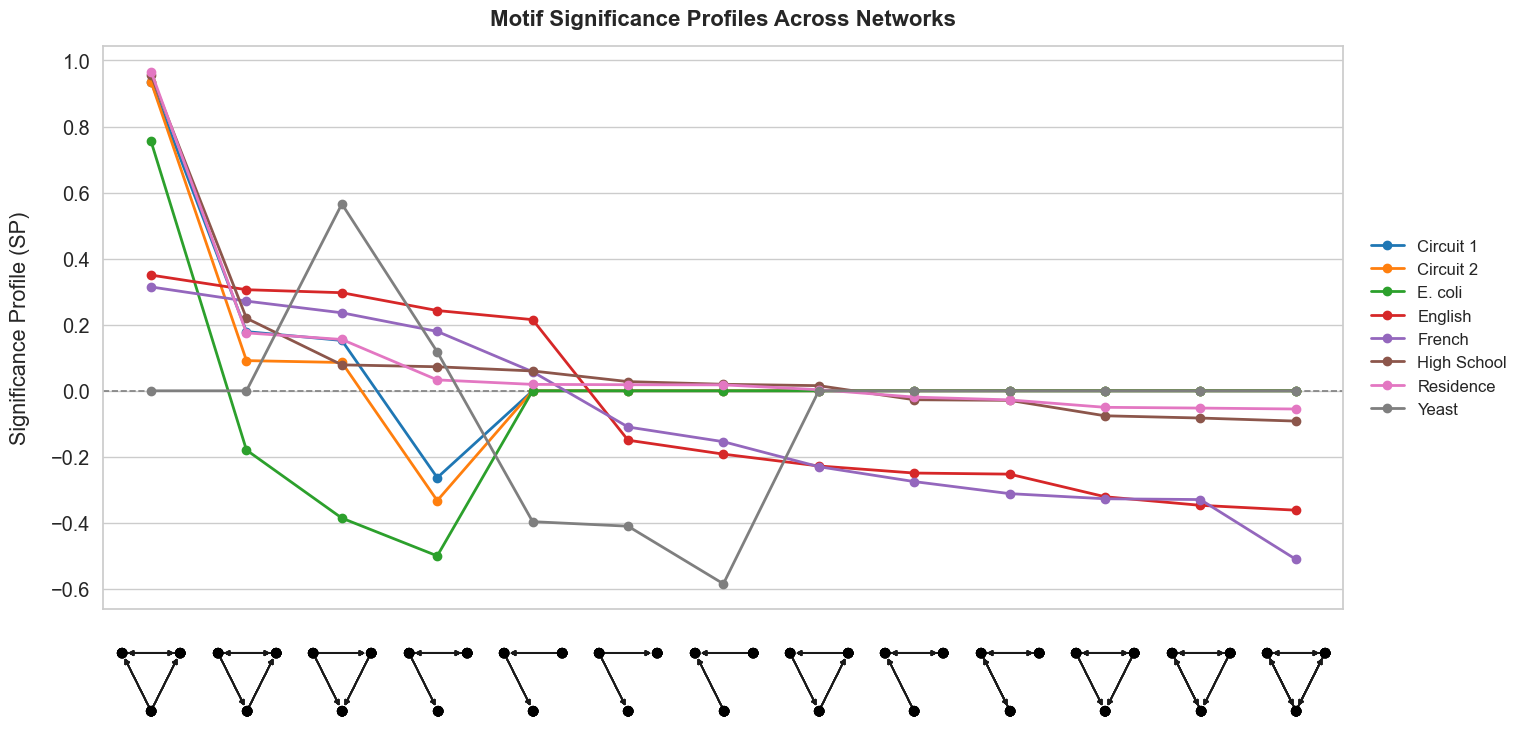

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import gridspec
import seaborn as sns

sns.set(style="whitegrid", context="notebook", font_scale=1.3)

# SP matrix (replace with your normalized vectors)
sp_matrix = np.array([
    z_vector_circuit1_norm,
    z_vector_circuit2_norm,
    z_vector_ecoli_norm,
    z_vector_english_norm,
    z_vector_french_norm,
    z_vector_highschool_norm,
    z_vector_residence_norm,
    z_vector_yeast_norm
])

network_labels = [
    "Circuit 1", "Circuit 2", "E. coli", "English",
    "French", "High School", "Residence", "Yeast"
]

motif_image_paths = [f"motifs_pngs_3/motif{i+1}.png" for i in range(13)] 

# Create figure with two subplots: top for SP, bottom for motif images
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0.05)

# --- Top subplot: SP plot ---
ax0 = plt.subplot(gs[0])
palette = sns.color_palette("tab10", n_colors=len(sp_matrix))

for i, sp in enumerate(sp_matrix):
    ax0.plot(range(13), sp, marker='o', label=network_labels[i],
             linewidth=2.0, markersize=6, color=palette[i], zorder=3)

ax0.axhline(0, color='gray', linestyle='--', linewidth=1.2, zorder=1)

ax0.set_xlim(-0.5, 12.5)
ax0.set_xticks([])  # No ticks because we’ll use images
ax0.set_ylabel("Significance Profile (SP)", labelpad=15)
ax0.set_title("Motif Significance Profiles Across Networks", fontsize=16, weight='bold', pad=15)
ax0.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=12)

# --- Bottom subplot: Motif images ---
ax1 = plt.subplot(gs[1])
ax1.axis("off")  # Hide axis completely

for x, img_path in enumerate(motif_image_paths):
    try:
        img = mpimg.imread(img_path)
        imagebox = OffsetImage(img, zoom=0.25)
        ab = AnnotationBbox(imagebox, (x, 0.5), frameon=False, box_alignment=(0.5, 0.5))
        ax1.add_artist(ab)
    except FileNotFoundError:
        print(f"Image not found: {img_path}")

ax1.set_xlim(-0.5, 12.5)
ax1.set_ylim(0, 1)

plt.tight_layout()
plt.show()

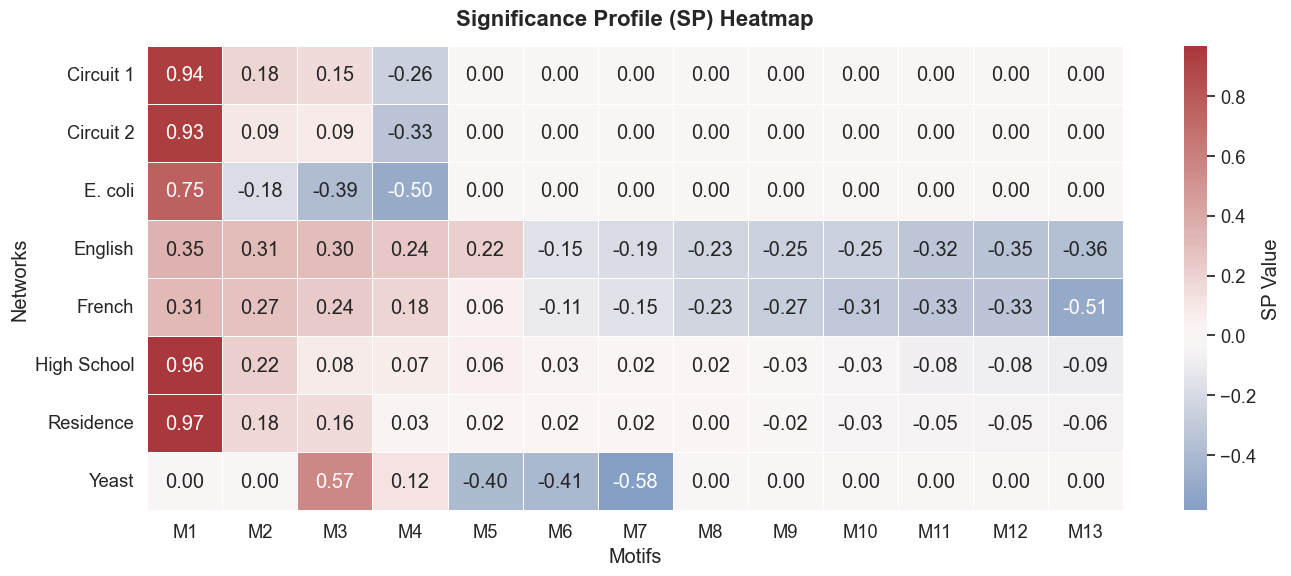

In [ ]:
# SP matrix: shape (8 networks, 13 motifs)
sp_matrix = np.array([
    z_vector_circuit1_norm,
    z_vector_circuit2_norm,
    z_vector_ecoli_norm,
    z_vector_english_norm,
    z_vector_french_norm,
    z_vector_highschool_norm,
    z_vector_residence_norm,
    z_vector_yeast_norm
])

network_labels = [
    "Circuit 1", "Circuit 2", "E. coli", "English",
    "French", "High School", "Residence", "Yeast"
]

motif_labels = [f"M{i+1}" for i in range(13)]

plt.figure(figsize=(14, 6))
sns.set(style="white", context="notebook", font_scale=1.2)

ax = sns.heatmap(sp_matrix, cmap="vlag", center=0, linewidths=0.5, 
                 xticklabels=motif_labels, yticklabels=network_labels,
                 annot=True, fmt=".2f", cbar_kws={'label': 'SP Value'})

ax.set_title("Significance Profile (SP) Heatmap", fontsize=16, weight='bold', pad=15)
plt.xlabel("Motifs")
plt.ylabel("Networks")
plt.tight_layout()
plt.show()

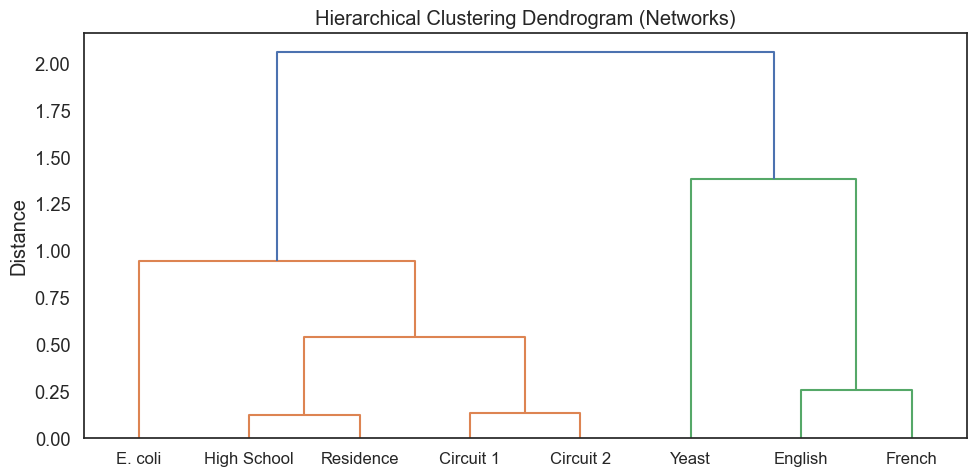

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Assuming sp_matrix and network_labels are already defined
# sp_matrix shape: (8 networks, 13 motifs)
# Rows = networks

# Perform hierarchical clustering
linked = linkage(sp_matrix, method='ward')  # or 'average', 'complete'

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, 
           labels=network_labels, 
           orientation='top', 
           distance_sort='ascending', 
           show_leaf_counts=True)

plt.title("Hierarchical Clustering Dendrogram (Networks)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


- **QUESTION (e)**

**Your task is to find the ”family” of the three ”unknown” networks** given in [unknown.zip](http://www.dcc.fc.up.pt/~pribeiro/aulas/ns2425/homework/unknown.zip) You should justify your answer by computing and plotting their motif significance profiles and
by adding them to the previous heatmap. Each network will clearly belong to one of the groups discovered on the previous question.

**Answer**: 


In [ ]:
z_vector_netA = np.array([
    43.93,    # motif 1
    1.99,    # motif 2
    1.50,    # motif 3
    -15.18,   # motif 4
    0.0,     # motif 5
    0.0,     # motif 6
    0.0,     # motif 7
    0.0,     # motif 8
    0.0,     # motif 9
    0.0,     # motif 10
    0.0,     # motif 11
    0.0,     # motif 12
    0.0      # motif 13
])

z_vector_netB = np.array([
    0,    # motif 1
    6.50,    # motif 2
    4.77,    # motif 3
    2.92,   # motif 4
    2.49,     # motif 5
    1.68,     # motif 6
    1.14,     # motif 7
    0.95,     # motif 8
    -1.55,     # motif 9
    -2.00,     # motif 10
    -4.03,     # motif 11
    -4.83,     # motif 12
    -4.83      # motif 13
])

z_vector_netC = np.array([
    9.23,    # motif 1
    8.53,    # motif 2
    8.05,    # motif 3
    5.56,   # motif 4
    0.41,     # motif 5
    -3.84,     # motif 6
    -6.31,     # motif 7
    -7.00,     # motif 8
    -7.89,     # motif 9
    -8.93,     # motif 10
    -11.05,     # motif 11
    -11.24,     # motif 12
    -16.45      # motif 13
])

z_vector_netA_norm = normalize_Z(z_vector_netA)
z_vector_netB_norm = normalize_Z(z_vector_netB)
z_vector_netC_norm = normalize_Z(z_vector_netC)

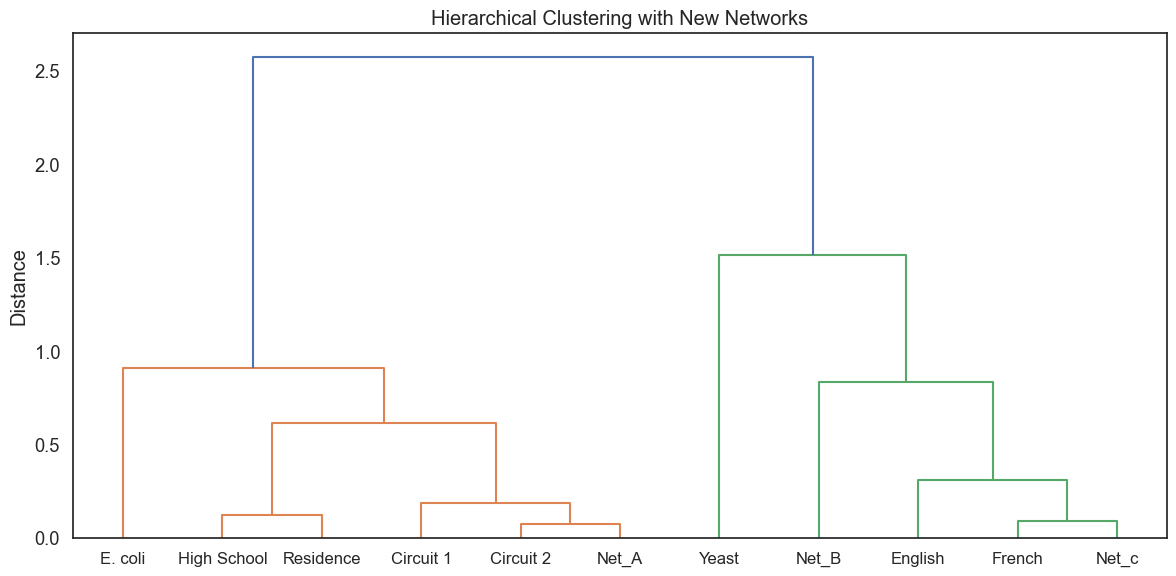

In [ ]:
new_sp_matrix = np.array([
    z_vector_netA_norm,
    z_vector_netB_norm,
    z_vector_netC_norm
])

# Stack them vertically
combined_matrix = np.vstack([sp_matrix, new_sp_matrix])

# Perform hierarchical clustering
linked_all = linkage(combined_matrix, method='ward')

# Combined labels (original + new)
combined_labels = network_labels + ["Net_A", "Net_B", "Net_c"]

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked_all,
           labels=combined_labels,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering with New Networks")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

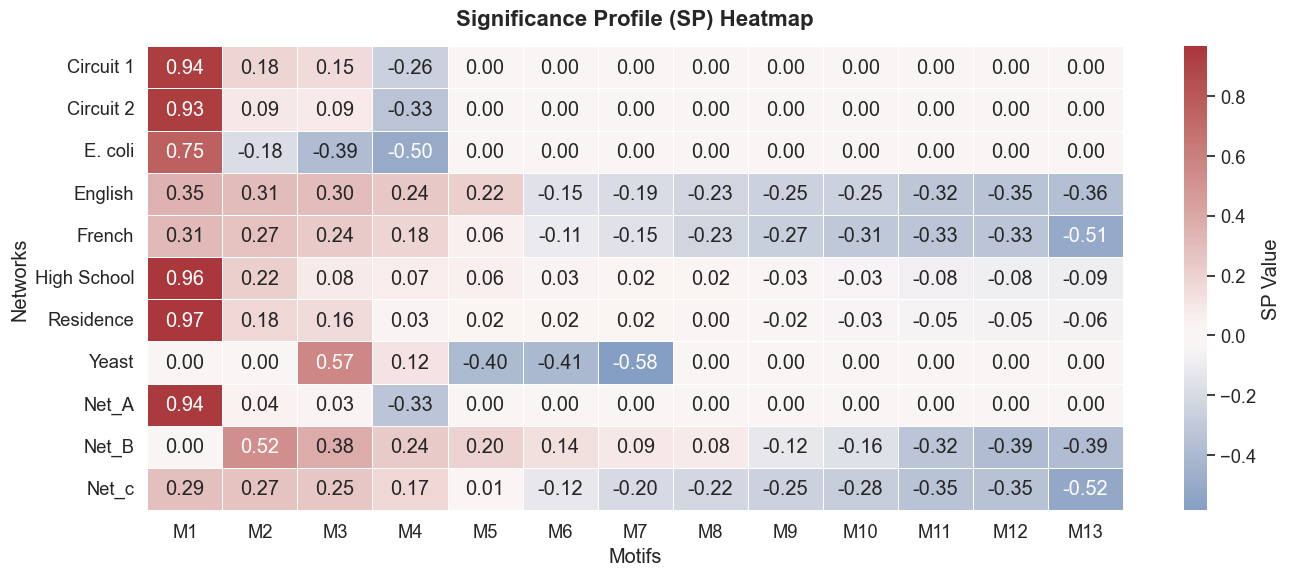

In [ ]:
plt.figure(figsize=(14, 6))
sns.set(style="white", context="notebook", font_scale=1.2)

ax = sns.heatmap(combined_matrix, cmap="vlag", center=0, linewidths=0.5, 
                 xticklabels=motif_labels, yticklabels=combined_labels,
                 annot=True, fmt=".2f", cbar_kws={'label': 'SP Value'})

ax.set_title("Significance Profile (SP) Heatmap", fontsize=16, weight='bold', pad=15)
plt.xlabel("Motifs")
plt.ylabel("Networks")
plt.tight_layout()
plt.show()

As shown above, the unknown networks belong to different clusters:
-   `Net_A` shows similar patterns to *circuit1 and circuit2*, suggesting it may be a circuit network.
-   `Net_B` shows simmilar patterns to *english or yeast*, indicating it could be either a language or a biological network.
-   `Net_C` shows simmilar patterns to *english and french* so it could be a language network.